# HK Model with Separable Landau Interaction

## 1. Setup 1D

In [ ]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

t = 1
d = 1

def I_1(vars):
    x, y = vars
    if np.abs(x / (2 * t * y)) < 1:
        return np.heaviside(x + 2 * t * y, 1) - np.arccos(x / (2 * t * y)) / np.pi
    else:
        return np.heaviside(x + 2 * t * y, 1)
    
def J_1(vars):
    x, y = vars
    if np.abs(x / (2 * t * y)) < 1:
        return - np.sqrt((2 * t * y)**2 - x**2) / np.pi
    else:
        return 0

# Only for U > 0!   
def GLS_1d(vars):
    rho, mu, U, e_tilde, f_0, f_1 = vars
    eq1 = rho - (I_1([mu - f_0 * rho, 1 + f_1 * e_tilde]) + I_1([mu - U - f_0 * rho, 1 + f_1 * e_tilde]))
    eq2 = e_tilde - (J_1([mu - f_0 * rho, 1 + f_1 * e_tilde]) + J_1([mu - U - f_0 * rho, 1 + f_1 * e_tilde]))
    return [eq1, eq2]

def solve_GLS_1d(rho, U, f_0, f_1, initial_guess):
    # def x = [mu, e_tilde]
    GLS_reduced = lambda x: GLS_1d([rho, x[0], U, x[1], f_0, f_1])
    sol = root(GLS_reduced, initial_guess, method='hybr')
    # Should return list [mu, e_tilde] for any given rho
    return sol.x

def make_solution_arrays(rho_array, U, f_0, f_1):
    mu_list = []
    e_tilde_list =[]

    for rho_val in rho_array:
        if U <= 4 * t * d:
            # Model as one straight line through start and endpoint
            guess_rho = (U / 2 + 2) * rho_val - 2
        else:
            # Model as two different lines for each band
            if rho_val <= 1:
                guess_rho = 4 * rho_val - 2
            else:
                guess_rho = 4 * rho_val + U - 6

        a = 1

        if U <= 4 * t * d:
            # Model as a(x**2 - 2x)
            guess_e = a * (rho_val**2 - 2 * rho_val)
        else:
            # Model as two different parabolas for each band
            if rho_val <= 1:
                guess_e = a * (rho_val**2 - rho_val)
            else:
                guess_e = a * (rho_val**2 - 3 * rho_val + 2)


        guess = [guess_rho, guess_e]

        sol = solve_GLS_1d(rho_val, U, f_0, f_1, guess)
        mu_list.append(sol[0])
        e_tilde_list.append(sol[1])

    mu_array = np.array(mu_list)
    e_tilde_array = np.array(e_tilde_list)

    return mu_array, e_tilde_array

def one_plot(x_array, y_array, x_label, y_label, title):
    plt.figure(dpi=100)
    # Plot erstellen
    plt.plot(x_array, y_array, linestyle='-')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show() 



To do: look at guess. write down soeq in 1d, try to figure aout good guessing spots, how do these look in multiple dimensions?

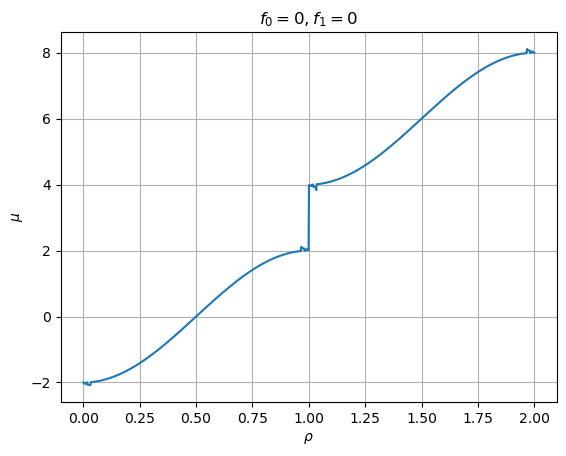

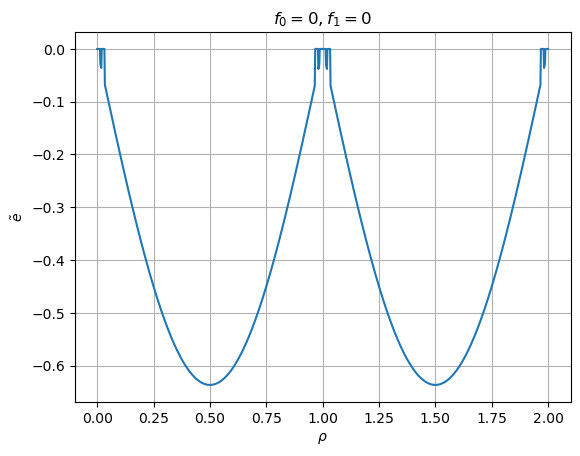

In [68]:
rho_array = np.linspace(0, 2, 1000)
mu_array, e_tilde_array = make_solution_arrays(rho_array, 6, 0, 0)
one_plot(rho_array, mu_array, r'$\rho$', r'$\mu$', r'$f_0 = 0, f_1=0$')
one_plot(rho_array, e_tilde_array, r'$\rho$', r'$\tilde{e}$', r'$f_0 = 0, f_1=0$')

In [56]:
print(e_tilde_array)

[-1.09907933e-04 -5.48125347e-12 -5.81410371e-11  3.72499045e-11
  1.59964889e-11  9.38909957e-11  9.47144412e-11 -1.11497887e-10
 -1.33201887e-10  1.83486747e-10 -1.86103397e-10 -4.40089166e-02
 -4.80024452e-02 -5.19940749e-02 -5.59836479e-02 -5.99710062e-02
 -6.39559923e-02 -6.79384485e-02 -7.19182172e-02 -7.58951410e-02
 -7.98690626e-02 -8.38398248e-02 -8.78072705e-02 -9.17712428e-02
 -9.57315848e-02 -9.96881400e-02 -1.03640752e-01 -1.07589264e-01
 -1.11533520e-01 -1.15473364e-01 -1.19408640e-01 -1.23339193e-01
 -1.27264867e-01 -1.31185506e-01 -1.35100956e-01 -1.39011062e-01
 -1.42915669e-01 -1.46814623e-01 -1.50707769e-01 -1.54594954e-01
 -1.58476023e-01 -1.62350823e-01 -1.66219201e-01 -1.70081004e-01
 -1.73936079e-01 -1.77784273e-01 -1.81625435e-01 -1.85459412e-01
 -1.89286053e-01 -1.93105206e-01 -1.96916721e-01 -2.00720446e-01
 -2.04516231e-01 -2.08303925e-01 -2.12083380e-01 -2.15854446e-01
 -2.19616973e-01 -2.23370812e-01 -2.27115815e-01 -2.30851835e-01
 -2.34578722e-01 -2.38296